In [27]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [28]:
#path = '../../output/weights/p_date=2022-11-13-17_13_55/log.json'
path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

166001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [29]:
slice = 200000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [30]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

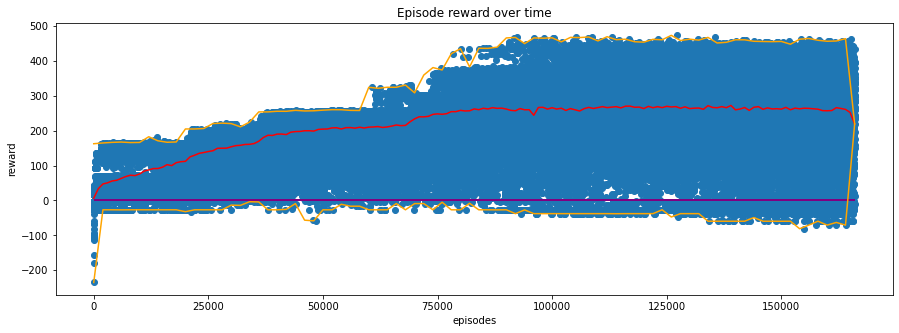

Maximum: 473.0675474088892
Average: 215.6929718394617

Values: 6.4 > 33.7 > 47.1 > 50.4 > 55.7 > 57.8 > 63.1 > 68.5 > 72.2 > 71.1 > 75.9 > 84.1 > 87.4 > 91.3 > 91.4 > 95.2 > 102.5 > 99.8 > 108.2 > 111.0 > 112.0 > 124.8 > 129.5 > 135.0 > 137.3 > 140.1 > 142.4 > 149.4 > 149.7 > 149.9 > 153.8 > 157.0 > 158.0 > 160.4 > 160.8 > 163.0 > 169.6 > 180.2 > 186.8 > 186.2 > 190.1 > 190.2 > 188.7 > 195.6 > 197.3 > 197.7 > 199.7 > 199.7 > 198.7 > 203.5 > 204.4 > 204.8 > 207.9 > 208.3 > 204.7 > 208.5 > 208.8 > 207.1 > 209.8 > 207.5 > 210.0 > 210.5 > 211.7 > 209.1 > 210.6 > 213.0 > 216.2 > 214.3 > 215.0 > 225.3 > 233.8 > 239.7 > 239.5 > 241.0 > 246.7 > 248.1 > 246.9 > 248.6 > 254.5 > 254.4 > 258.1 > 256.4 > 256.9 > 262.3 > 260.0 > 264.2 > 262.1 > 265.9 > 263.8 > 264.5 > 261.9 > 258.1 > 257.0 > 263.2 > 259.8 > 259.9 > 244.1 > 266.4 > 266.8 > 261.7 > 265.8 > 261.8 > 264.3 > 257.9 > 263.2 > 259.6 > 256.3 > 263.1 > 266.7 > 263.5 > 266.3 > 268.8 > 266.0 > 267.3 > 268.8 > 265.2 > 270.1 > 270.3 > 267.0 > 267

In [31]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

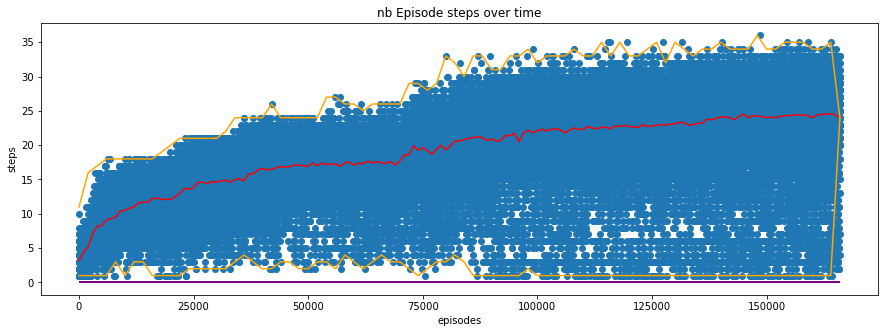

Maximum: 36
Average: 18.941693122330587

Values: 3.2 > 4.5 > 5.2 > 7.2 > 8.2 > 8.3 > 9.1 > 9.3 > 9.5 > 10.4 > 10.5 > 10.8 > 11.0 > 11.6 > 11.7 > 11.7 > 12.2 > 12.3 > 12.1 > 12.1 > 12.1 > 12.5 > 13.0 > 13.7 > 13.6 > 13.8 > 14.6 > 14.6 > 14.4 > 14.7 > 14.6 > 14.8 > 14.9 > 14.6 > 15.0 > 15.1 > 14.8 > 15.8 > 15.8 > 16.4 > 16.6 > 16.4 > 16.5 > 16.7 > 16.9 > 16.8 > 16.9 > 17.1 > 17.1 > 17.0 > 16.9 > 17.4 > 17.0 > 17.4 > 17.2 > 17.2 > 17.3 > 16.9 > 17.5 > 17.5 > 17.1 > 17.4 > 17.3 > 17.7 > 17.4 > 17.6 > 17.4 > 17.4 > 17.6 > 17.1 > 17.7 > 18.6 > 18.6 > 19.9 > 19.3 > 19.6 > 19.2 > 18.7 > 19.4 > 20.0 > 19.3 > 19.9 > 20.6 > 20.6 > 20.8 > 21.0 > 21.1 > 21.2 > 21.1 > 20.7 > 20.9 > 20.6 > 20.7 > 21.4 > 21.4 > 21.7 > 20.5 > 21.8 > 22.2 > 21.8 > 22.1 > 22.3 > 22.1 > 22.3 > 22.4 > 22.2 > 21.8 > 22.2 > 22.5 > 22.3 > 22.3 > 22.7 > 22.5 > 22.4 > 22.6 > 22.6 > 22.4 > 22.8 > 22.7 > 22.9 > 22.7 > 22.7 > 22.6 > 23.0 > 22.7 > 22.8 > 22.9 > 23.0 > 22.9 > 23.1 > 23.1 > 23.3 > 23.3 > 22.9 > 23.0 > 23.2 > 23.2 > 2

In [32]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

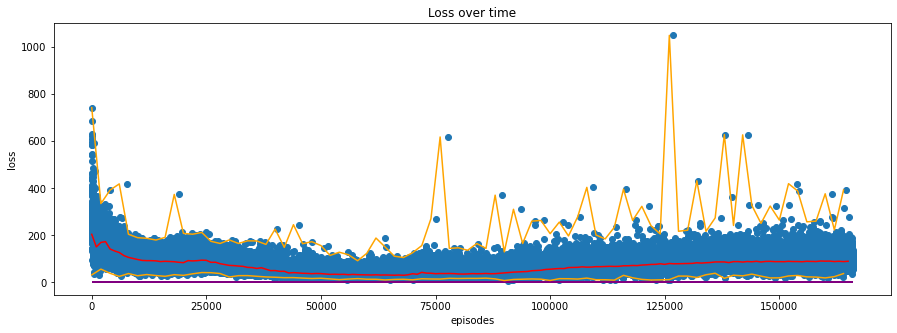

Maximum: 1050.0494384765625
Average: 68.67321138726793

Values: 204.4 > 151.1 > 170.1 > 173.5 > 142.0 > 133.7 > 127.2 > 114.3 > 106.6 > 102.0 > 97.5 > 93.6 > 92.7 > 92.6 > 91.7 > 88.6 > 89.9 > 89.1 > 88.1 > 85.6 > 84.0 > 92.8 > 91.5 > 92.6 > 94.7 > 94.0 > 85.6 > 85.8 > 79.7 > 76.1 > 72.5 > 71.5 > 69.7 > 68.4 > 63.9 > 63.2 > 59.4 > 62.5 > 56.5 > 50.2 > 50.5 > 47.2 > 47.4 > 40.2 > 41.8 > 40.6 > 38.9 > 38.4 > 37.2 > 38.2 > 37.6 > 35.9 > 34.3 > 34.8 > 34.1 > 34.6 > 32.8 > 34.3 > 33.0 > 32.6 > 31.8 > 31.7 > 32.5 > 31.4 > 31.8 > 31.3 > 30.8 > 31.6 > 30.5 > 32.5 > 37.1 > 34.7 > 43.0 > 39.6 > 39.2 > 37.1 > 38.0 > 37.7 > 38.1 > 37.5 > 36.1 > 35.6 > 36.3 > 37.5 > 37.0 > 37.2 > 38.1 > 37.0 > 37.3 > 38.9 > 40.5 > 41.8 > 43.9 > 44.8 > 46.0 > 46.5 > 49.8 > 50.7 > 51.9 > 55.1 > 56.2 > 58.0 > 59.2 > 58.8 > 63.3 > 63.9 > 64.2 > 66.4 > 64.9 > 65.3 > 67.2 > 67.0 > 67.6 > 68.6 > 68.0 > 68.4 > 70.9 > 70.9 > 72.1 > 71.5 > 73.9 > 74.9 > 76.5 > 76.9 > 79.4 > 76.9 > 80.5 > 79.2 > 79.4 > 80.0 > 80.6 > 81.0 > 83

In [33]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

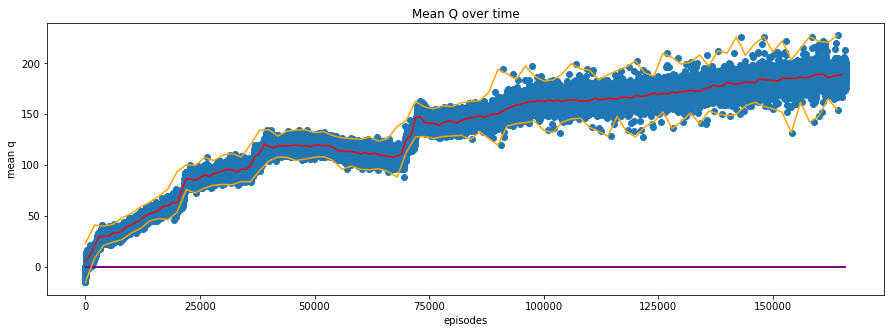

Maximum: 227.70208740234375
Average: 132.9920444678421

Values: 5.6 > 10.8 > 20.6 > 29.4 > 29.7 > 29.9 > 33.0 > 33.2 > 35.1 > 39.4 > 40.9 > 43.7 > 45.8 > 49.6 > 52.0 > 53.4 > 55.5 > 59.4 > 60.1 > 62.9 > 62.9 > 74.7 > 86.3 > 86.1 > 85.1 > 87.3 > 90.3 > 88.7 > 91.5 > 92.9 > 94.3 > 95.9 > 95.2 > 93.0 > 95.9 > 95.7 > 99.1 > 108.6 > 111.2 > 120.7 > 118.4 > 117.1 > 119.0 > 118.9 > 118.9 > 119.4 > 119.5 > 119.0 > 119.2 > 118.1 > 119.7 > 119.6 > 119.2 > 119.3 > 117.4 > 114.6 > 113.8 > 113.1 > 113.5 > 112.3 > 111.1 > 112.4 > 110.7 > 111.6 > 110.1 > 109.4 > 108.5 > 107.8 > 108.6 > 111.2 > 125.6 > 129.3 > 146.3 > 147.7 > 141.7 > 141.3 > 141.4 > 138.8 > 141.4 > 143.2 > 143.3 > 141.1 > 143.9 > 145.4 > 146.6 > 147.1 > 148.8 > 146.9 > 148.8 > 150.5 > 150.5 > 152.9 > 155.7 > 157.3 > 159.2 > 159.7 > 161.3 > 162.1 > 162.5 > 163.7 > 162.4 > 164.0 > 162.8 > 163.9 > 162.6 > 163.5 > 164.5 > 163.9 > 163.0 > 163.3 > 163.2 > 165.8 > 164.3 > 164.7 > 165.7 > 165.5 > 165.0 > 167.0 > 166.6 > 165.9 > 168.4 > 167.5 

In [34]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

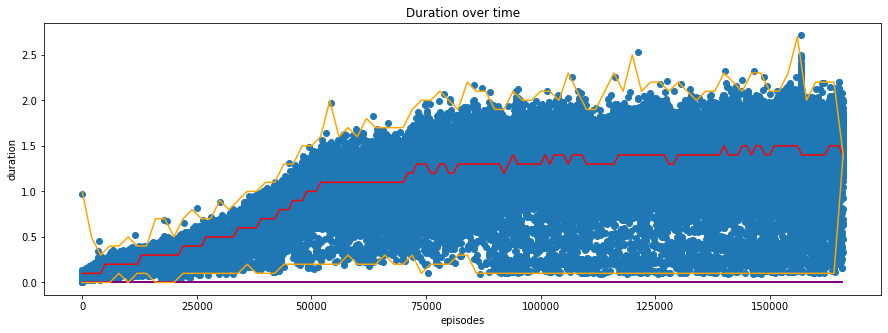

Maximum: 2.7136080189957283
Average: 1.0516759716762094

Values: 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4 > 0.5 > 0.5 > 0.5 > 0.5 > 0.5 > 0.5 > 0.5 > 0.6 > 0.6 > 0.6 > 0.6 > 0.6 > 0.7 > 0.7 > 0.7 > 0.7 > 0.8 > 0.8 > 0.8 > 0.9 > 0.9 > 0.9 > 1.0 > 1.0 > 1.0 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.1 > 1.2 > 1.2 > 1.3 > 1.3 > 1.3 > 1.2 > 1.2 > 1.3 > 1.3 > 1.2 > 1.2 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.2 > 1.3 > 1.4 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.4 > 1.3 > 1.4 > 1.4 > 1.4 > 1.3 > 1.4 > 1.4 > 1.4 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.3 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.3 > 1.3 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.4 > 1.5 > 1.4 > 1.4 > 1.4 > 1.5 > 1.5 > 1.4 > 1.5 > 1.5 > 1.4 > 1.4 > 1.5 > 1.5 > 1.5 > 1.5 > 1.5 >

In [35]:
plot(duration, "Duration over time", "episodes", "duration")